# Prova 2

Caio Henrique Gonçalves Marques, N_USP:10235481

In [46]:
#pacotes utilizados
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import classification_report ,  mean_squared_error
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.svm import SVC
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA

# Questão 1

In [2]:
#alternativa A FALTA TERMINAR


#definindo as duas amostras pseudo-aleatórias 
media1 = 1
media2 = 0.5
size= (10000,10)
lambda1 = media1
lambda2 = media2

amostra1 = np.random.exponential(scale=lambda1,size=size)
amostra2 = np.random.exponential(scale=lambda2,size=size)



In [3]:
 index = amostra1 > 0  

In [4]:
index.astype(float).sum()

100000.0

# Questão 2

In [5]:
#retirando a coluna de index 
df = pd.read_csv("C:/Users/9900Ks/Downloads/Boston.csv")
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
y = df['medv']
X = df.drop(columns='medv')

In [6]:
X_test =  X[X.index>252]
X_train = X[X.index<=252]
y_test =  y[y.index>252]
y_train = y[y.index<=252]



In [7]:
#sem podas
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
y_pred =  reg.predict(X_test)
print(f"MSE:{mean_squared_error(y_test,y_pred)}")

MSE:37.944664031620555


In [8]:
#com podas 
reg = DecisionTreeRegressor(random_state=0,max_depth=3)
reg.fit(X_train,y_train)
y_pred =  reg.predict(X_test)
print(f"MSE:{mean_squared_error(y_test,y_pred)}")

MSE:37.88680540582853


In [9]:
#para a questão b  vou usar um pacote chamado pycaret,ele testa o dataset em varios modelos 
df = pd.read_csv("C:/Users/9900Ks/Downloads/Boston.csv")
regressor = setup(
    data=df,
    train_size=0.5,
    session_id=123,
    target='medv',
    normalize=True,
    verbose=False

)

In [10]:
#o melhor modelo para o dataset foi o Gradient Boosting Regressor
compare_models(sort="MSE");


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,2.2855,11.2719,3.2509,0.8496,0.1482,0.1158,0.0557
1,Extra Trees Regressor,2.2342,11.8231,3.2263,0.8557,0.1415,0.1107,0.0795
2,CatBoost Regressor,2.2087,12.7756,3.3823,0.8447,0.1468,0.1117,0.8870
3,Random Forest,2.3582,12.9040,3.4147,0.8360,0.1558,0.1204,0.1078
4,Extreme Gradient Boosting,2.6461,16.3756,3.8309,0.7951,0.1694,0.1339,0.0389
5,Light Gradient Boosting Machine,2.7306,16.7379,3.8566,0.7865,0.1800,0.1398,0.0221
6,AdaBoost Regressor,2.9174,18.2321,4.0921,0.7727,0.1849,0.1496,0.0558
7,Decision Tree,3.1110,21.2092,4.4624,0.7229,0.1958,0.1548,0.0030
8,K Neighbors Regressor,3.2040,24.8781,4.7635,0.6942,0.1903,0.1475,0.0020
9,Bayesian Ridge,3.3777,25.2477,4.8352,0.6977,0.2240,0.1714,0.0025


# Questão 3 

In [11]:
df = pd.DataFrame(data = np.random.normal(size=(200,2)),columns=("X1","X2"))

In [12]:
df["y"] = (df.X1**3 + df.X2**2 + (df.X1*df.X2)**2)
df["y"] = (df["y"] > 0.5).astype(float)
df

,X1,X2,y
0,-2.364048,1.381505,0.0
1,-1.431892,-1.713578,1.0
2,-1.664053,0.375892,0.0
3,-0.791640,1.690373,1.0
4,0.195465,-0.460378,0.0
...,...,...,...
195,-0.211538,1.574052,1.0
196,-0.978124,1.221321,1.0
197,-0.649077,-0.437645,0.0
198,-0.053385,2.542480,1.0


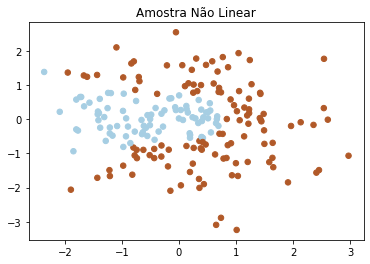

In [13]:
plt.scatter(df.X1, df.X2, c=df.y, s=30, cmap=plt.cm.Paired)
plt.title("Amostra Não Linear")
plt.show()

In [14]:
# separando em treino e test 
X = df[["X1","X2"]]
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 123)

In [15]:
#accuracy: 0.74
clf = SVC(C=0.01,random_state=42,kernel='linear')
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
y_pred_C_001 = y_pred.copy()
classification_report(y_test,y_pred,output_dict=True)

{'0.0': {'precision': 0.7272727272727273,
  'recall': 0.4444444444444444,
  'f1-score': 0.5517241379310345,
  'support': 18},
 '1.0': {'precision': 0.7435897435897436,
  'recall': 0.90625,
  'f1-score': 0.8169014084507042,
  'support': 32},
 'accuracy': 0.74,
 'macro avg': {'precision': 0.7354312354312355,
  'recall': 0.6753472222222222,
  'f1-score': 0.6843127731908694,
  'support': 50},
 'weighted avg': {'precision': 0.7377156177156178,
  'recall': 0.74,
  'f1-score': 0.7214375910636232,
  'support': 50}}

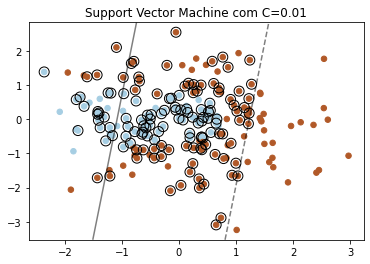

In [16]:


plt.scatter(X.X1, X.X2, c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vector Machine com C=0.01")
plt.show()

In [17]:
# repetindo o processo para SVM com margem flexível 

In [18]:
#'accuracy': 0.66
clf = SVC(C=1000,random_state=42,kernel='linear')
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
y_pred_C_100 = y_pred.copy()
classification_report(y_test,y_pred,output_dict=True)

{'0.0': {'precision': 0.5238095238095238,
  'recall': 0.6111111111111112,
  'f1-score': 0.5641025641025642,
  'support': 18},
 '1.0': {'precision': 0.7586206896551724,
  'recall': 0.6875,
  'f1-score': 0.7213114754098361,
  'support': 32},
 'accuracy': 0.66,
 'macro avg': {'precision': 0.6412151067323482,
  'recall': 0.6493055555555556,
  'f1-score': 0.6427070197562001,
  'support': 50},
 'weighted avg': {'precision': 0.6740886699507389,
  'recall': 0.66,
  'f1-score': 0.6647162673392182,
  'support': 50}}

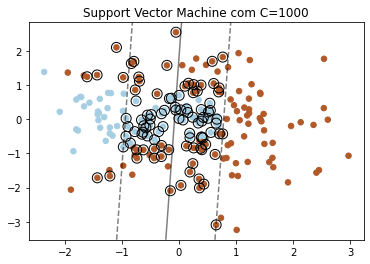

In [19]:
plt.scatter(X.X1, X.X2, c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vector Machine com C=1000")
plt.show()

In [20]:
#repetindo o processo para um kernel diferente 

In [21]:
#'accuracy': 0.92
clf = SVC(C=1,random_state=42,kernel='rbf')
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
classification_report(y_test,y_pred,output_dict=True)

{'0.0': {'precision': 0.9473684210526315,
  'recall': 1.0,
  'f1-score': 0.972972972972973,
  'support': 18},
 '1.0': {'precision': 1.0,
  'recall': 0.96875,
  'f1-score': 0.9841269841269841,
  'support': 32},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9736842105263157,
  'recall': 0.984375,
  'f1-score': 0.9785499785499785,
  'support': 50},
 'weighted avg': {'precision': 0.9810526315789474,
  'recall': 0.98,
  'f1-score': 0.9801115401115402,
  'support': 50}}

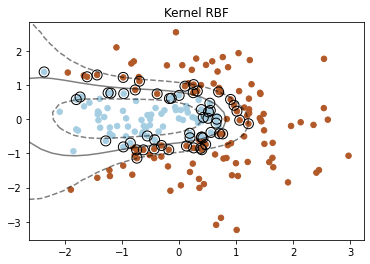

In [22]:
plt.scatter(X.X1, X.X2, c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Kernel RBF")
plt.show()

In [23]:
#concatenei as duas previsões dos modelos com kernel linear
table = np.vstack([y_pred_C_001,y_pred_C_100])


# calculate mcnemar test
result = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

statistic=1.000, p-value=1.000
Same proportions of errors (fail to reject H0)


# Questão 4

In [24]:
df = pd.read_csv("C:/Users/9900Ks/Downloads/food-texture.csv")
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,Oil,Density,Crispy,Fracture,Hardness
0,16.5,2955,10,23,97
1,17.7,2660,14,9,139
2,16.2,2870,12,17,143
3,16.7,2920,10,31,95
4,16.3,2975,11,26,143


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled =  sc.fit_transform(df.values)
df_scaled.shape

(50, 5)

In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Variância Explicada: 0.9999


<Figure size 720x720 with 0 Axes>

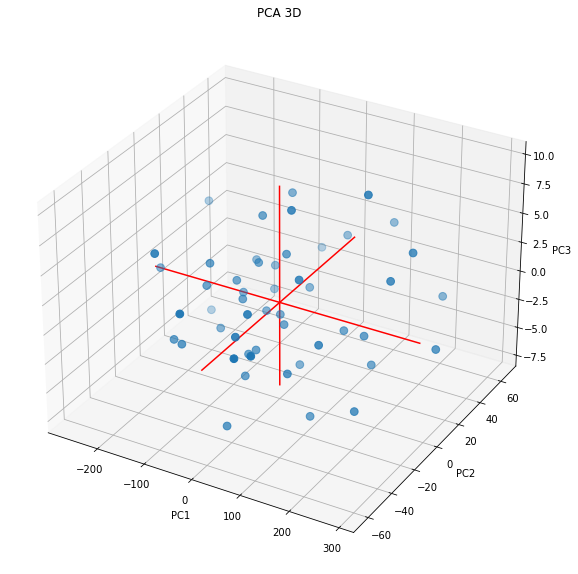

Variância Explicada: 0.9999


In [43]:

plt.figure(figsize=(10,10))

# Run The PCA
pca = PCA(n_components=3,random_state=0)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D")
plt.show()

print(f"Variância Explicada: {pca.explained_variance_ratio_.sum():.4f}")

In [29]:
#Questão 2.B -  análise fatorial (AF) 

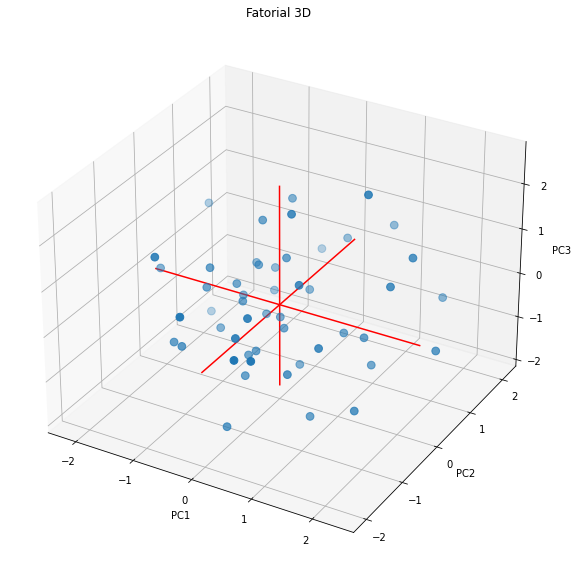

In [45]:



# Run The PCA
pca = FactorAnalysis(n_components=3,random_state=0)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Fatorial 3D")
plt.show()


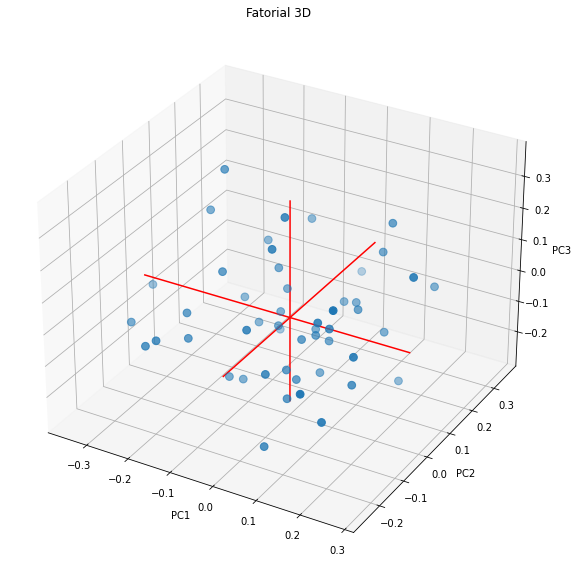

In [47]:
# Run The PCA
pca = FastICA(n_components=3,random_state=0)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Componentes Independentes 3D")
plt.show()
